## Оглавление
1. [Изучение данных из файла](#read_data)
2. [Предобработка данных](#pre_processing)
3. [Функции для расчета и анализа LTV, ROI, удержания и конверсии](#add_functions)
4. [Исследовательский анализ данных](#research)
5. [Маркетинг](#marketing)
6. [Оценка окупаемости рекламы](#cost_recovery)
7. [Общий вывод](#sumup)


## Анализ маркетинговых расходов развлекательного приложения Procrastinate Pro+
Имеются данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

На основании имеющихся данных нам необходимо изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

**Цель исследования** — разобраться в причинах уботочности рекламных кампаний за последние месяцы и помочь компании выйти в плюс. 

**Ход исследования**

Перед проверкой метрик понадобится обзор и предобработка данных.

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем мы устраним проблемы, проведем исследовательский анализ данных, изучим LTV, ROI, коэффициенты удержания и конверсии. В финале исследования мы проанализируем окупаемость рекламы, используя графики LTV, ROI и CAC.

Таким образом, исследование пройдёт в шесть этапов:

1. Обзор данных.
2. Предобработка данных.
3. Задание функции для расчета и анализа LTV, ROI, удержания и конверсии.
4. Исследовательский анализ:
 * создим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей
 * выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны
 * узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства
 * изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
5. Маркетинг:
 * посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени
 * узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика.
6. Оценка окупаемости рекламы: 
 * проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI
 * проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI
 * проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI
 * построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

## 1. Изучение данных из файла
<a name="read_data"></a>

Изучим данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

In [193]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [194]:
# изучим данные

try:
    visits = pd.read_csv('visits_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [195]:
try:
    orders = pd.read_csv('orders_info_short.csv')
except:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [196]:
try:
    costs = pd.read_csv('costs_info_short.csv')
except:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [197]:
visits.info() # выведем сводную информацию о таблице visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [198]:
orders.info() # выведем сводную информацию о таблице orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [199]:
costs.info() # выведем сводную информацию о таблице costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Вывод

В таблице visits из 309901 строк и 6 столбцов представлен лог сервера с информацией о посещениях сайта. В таблице orders из 40212 строк и 3 столбцов представлена информация о покупках. В таблице costs из 1800 строк и 3 столбцов представлена информация о расходах на рекламу. В таблицах нет пропусков.

Предварительно можно утверждать, что данных достаточно для выполнения задачи - выяснения причин уботочности рекламных кампаний за последние месяцы. Но для окончательного ответа на этот вопрос нужно провести предобработку данных.

На данный момент очевидно, что необходимо:

* привести названия столбцов к змеиному регистру;
* изменить тип данных для столбцов с датой;
* проверить данные на дубликаты.

Сделаем это в следующем блоке.

## 2. Предобработка данных
<a name="pre_processing"></a>

In [200]:
# приведем названия столбцов таблицы visits к змеиному регистру
visits.columns = visits.columns.str.lower()
visits = visits.rename(
columns={
'user id': 'user_id',
'session start': 'session_start',
'session end': 'session_end',}
)

visits.columns # проверим результат

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [201]:
# приведем названия столбцов таблицы orders к змеиному регистру
orders = orders.rename(
columns={
'User Id': 'user_id',
'Event Dt': 'event_dt',
'Revenue': 'revenue',}
)

orders.columns # проверим результат

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [202]:
# приведем названия столбцов таблицы costs к змеиному регистру
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [203]:
# изменим тип данных для столбцов с датой
visits['session_start'] = pd.to_datetime(visits['session_start']) 
visits['session_end'] = pd.to_datetime(visits['session_end']) 
orders['event_dt'] = pd.to_datetime(orders['event_dt']) 
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


In [204]:
# проверим категориальные данные на наличие скрытых дубликатов
display(visits['region'].unique())
display(visits['device'].unique())
display(visits['channel'].unique())
costs['channel'].unique()

#дубликатов нет

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [205]:
# проверим данные на наличие дубликатов
orders.duplicated().sum() # дубликатов нет

0

In [206]:
# проверим данные на наличие дубликатов
visits.duplicated().sum() # дубликатов нет

0

In [207]:
# проверим данные на наличие дубликатов
costs.duplicated().sum() # дубликатов нет

0

### Вывод

Предобработка показала, что в данных нет дубликатов.

Основные выводы:

* мы привели названия столбцов к змеиному регистру;
* изменили тип данных для столбцов с датой: `session_start` и `session_end` таблицы visits, `event_dt` таблицы orders, `dt` таблицы costs.

##  3. Функции для расчета и анализа LTV, ROI, удержания и конверсии
<a name="add_functions"></a>

In [208]:
# зададим функцию для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

# находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [209]:
# зададим функцию для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [210]:

# зададим функцию для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [211]:
# зададим функцию для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [212]:
# зададим функцию для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [213]:
# зададим функцию для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [214]:
# зададим функцию для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [215]:
# зададим функцию для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## 4. Исследовательский анализ данных
<a name="research"></a>

### Задача
* Создайте пользовательские профили. Определите минимальную и максимальную даты привлечения пользователей
* Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны
* Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства
* Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения
* Напишите промежуточные выводы.

In [216]:
# создадим пользовательские профили

profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [217]:
# определим минимальную и максимальную даты привлечения пользователей
display(profiles['first_ts'].min())
profiles['first_ts'].max()

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-27 23:59:04')

In [218]:
# выясним, из каких стран пользователи приходят в приложение
profiles['region'].value_counts()

United States    100002
UK                17575
France            17450
Germany           14981
Name: region, dtype: int64

In [219]:
# выясним, на какую страну приходится больше всего платящих пользователей
profiles.query('payer == True')['region'].value_counts()

United States    6902
UK                700
France            663
Germany           616
Name: region, dtype: int64

In [220]:
# построим таблицу, отражающую количество пользователей и долю платящих из каждой страны
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


In [221]:
# узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи
display(profiles['device'].value_counts()) 
profiles.query('payer == True')['device'].value_counts()


iPhone     54479
Android    35032
PC         30455
Mac        30042
Name: device, dtype: int64

iPhone     3382
Android    2050
Mac        1912
PC         1537
Name: device, dtype: int64

In [222]:
# построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства
profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


In [223]:
# изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей
display(profiles['channel'].value_counts())
profiles.query('payer == True')['channel'].value_counts()
    

organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: channel, dtype: int64

FaceBoom              3557
TipTop                1878
organic               1160
WahooNetBanner         453
AdNonSense             440
RocketSuperAds         352
LeapBob                262
OppleCreativeMedia     233
lambdaMediaAds         225
YRabbit                165
MediaTornado           156
Name: channel, dtype: int64

In [224]:
#  построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения
profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


### Вывод
* в приложение приходят пользователи из 4 стран: United States, UK, France и Germany. Больше всего платящих пользователей приходится на United States — почти в 10 раз больше чем на следующую страну в списке. Самая высокая доля платящих пользователей также приходится на США (почти 7%), однако в Германии, Великобритании и Франции доли меньше примерно в два раза, а не в 10, как в общем количестве пользователей
* клиенты заходят в приложение со следующих устройств: iPhone, Android, Mac и PC, самое популярное устройство среди платящих пользователей — iPhone. Однако доля платящих пользователей от общего количества пользователей выше (хоть и незначительно) для Mac, чем для iPhone
* самый популярный канал привлечения ожидаемо Organic (почти в два раза популярнее следующего в списке канала FaceBoom), однако по количеству платящих пользователей этот канал находится лишь на третьем месте. Больше всего платящих пользователей принес канал FaceBoom, на втором месте TipTop. Что касается доли платящих пользователей по отношению к неплатящим, то тут также лидирует канал FaceBoom, TipTop же находится лишь на четвертом месте. Органические пользователи почти не платят, их доля лишь 2 процента. 

## 5. Маркетинг
<a name="marketing"></a>

### Задача
* Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени
* Узнайте, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитайте средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используйте профили пользователей
* Напишите промежуточные выводы.

In [225]:
# посчитаем общую сумму расходов на маркетинг
round(profiles['acquisition_cost'].sum())

105497

In [226]:
# проверим, как траты распределены по источникам
profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values(by = 'acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


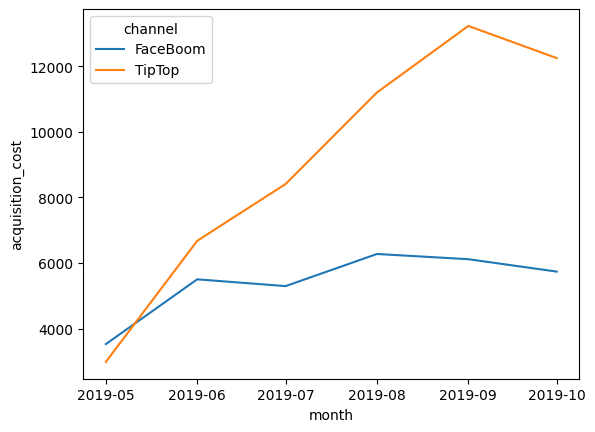

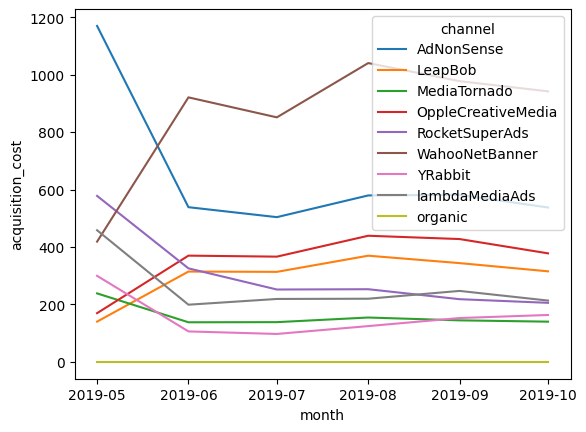

In [227]:
# построим график изменения затрат на рекламу во времени в разбивке по каналам
# на продвижение у двух двух лидеров было потрачено в разы больше средств, поэтому разобьем график на два: 
# TipTop, FaceBoom и все остальные

month_leaders = (
    profiles.query('channel == "TipTop" or channel == "FaceBoom"')
    .pivot_table(index=['month', 'channel'], values='acquisition_cost', aggfunc='sum')
    .sort_values(by='month')
)

sns.lineplot(data=month_leaders, x='month', y='acquisition_cost', hue='channel')
plt.show()

month_others = (
     profiles.query('channel != "TipTop" and channel != "FaceBoom"')
    .pivot_table(index=['month', 'channel'], values='acquisition_cost', aggfunc='sum')
    .sort_values(by='month')
)
sns.lineplot(data=month_others, x='month', y='acquisition_cost', hue='channel')
plt.show()

In [228]:
# рассчитаем, сколько в среднем стоило привлечение одного платного и "смешанного" (в том числе пришедшего органически) пользователя
display(round(profiles['acquisition_cost'].mean(), 3))
display(round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 3))

# рассчитаем, сколько в среднем стоило привлечение одного пользователя из каждого источника
(
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
)

0.703

1.127

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


### Вывод
* Всего на рекламу за исследуемый период было потрачено 105497 рублей, половина из этой суммы была вложена в канал TipTop, который, как мы помним, находится на втором месте по количеству и на четвертом по доле платящих пользователей. Треть рекламного бюджета была вложена в продвижение на канале FaceBoom, который оказался наиболее выгодным и принес наибольшее количество и долю платящих пользователей при более низком уровне затрат.
* Траты на продвижение с помощью TipTop значительно росли на протяжении времени и достигли своего пика (13000 рублей) в сентябре 2019 года, в то время как расходы на FaceBoom держались примерно на одном уровне, не превышая 6000 рублей в месяц. У остальных каналов продвижения похожее распределение трат во времени: повышение или снижение расходов в июне и с этого времение затраты держались на одном уровне до октября 2019 года.
* Средняя стоимость привлечения одного пользователя — 0,703 руб., а стоимость привлечения платного пользователя — 1,127 руб. Самый дорогой привлеченный с помощью рекламы пользователь — с платформы TipTop, пользователь с платформы FaceBoom — в 2,5 раза дешевле.

## 6. Оценка окупаемости рекламы
<a name="cost_recovery"></a>

## Задача
* Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.
* Проанализируйте общую окупаемость рекламы. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
* Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
* Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Опишите обнаруженные проблемы и напишите промежуточные выводы.
* Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

* Ответьте на такие вопросы:
 * Окупается ли реклама в целом?
 * Какие устройства, страны и каналы могут снижать окупаемость рекламы?
 * Чем могут быть вызваны проблемы окупаемости?
 * Опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Мы исключили органических пользователей из анализа, т.к. нам необходимо понять, окупается ли реклама, то есть соотнести затраты на маркетинг с результатом. Органические пользователи приходят самостоятельно, они "бесплатны", поэтому для оценки окупаемости мы их исключим.

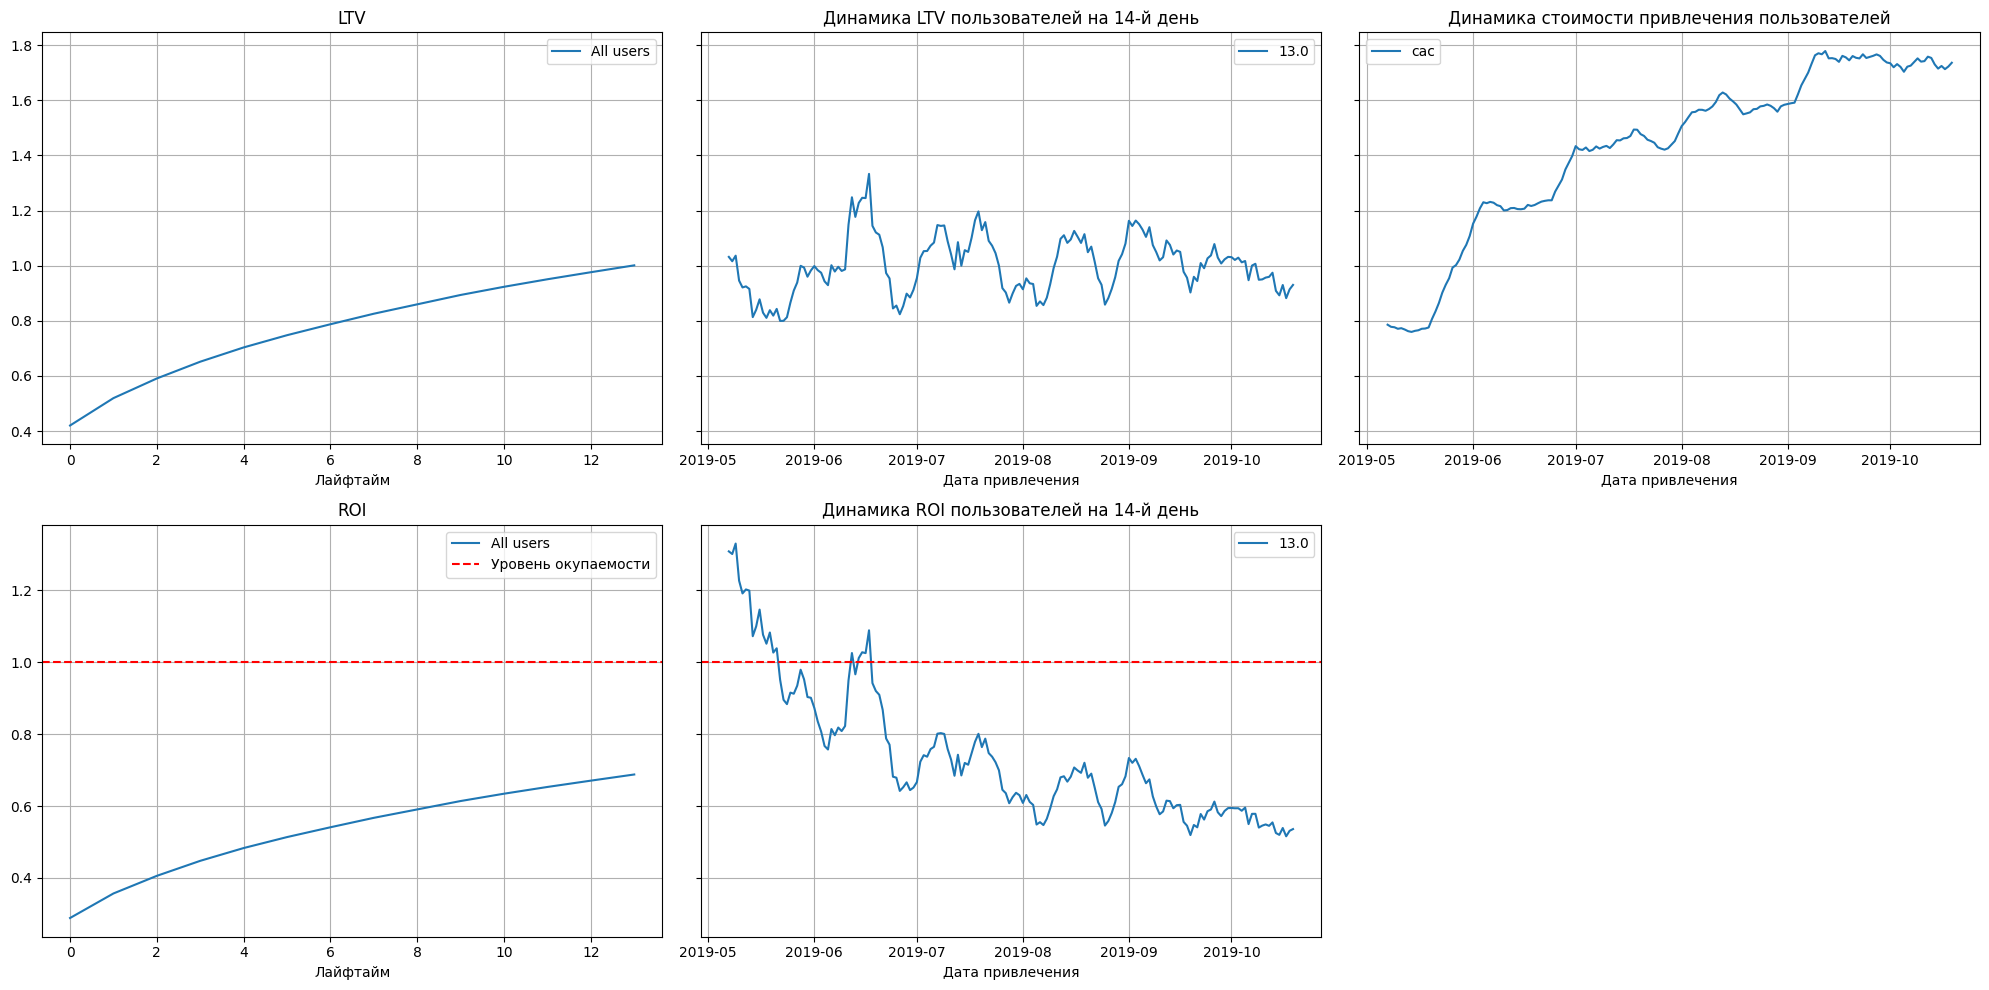

In [229]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
profiles_non_organic = profiles.query('channel != "organic"') # исключим органических пользователей
profiles_non_organic_USA = profiles_non_organic.query('region == "United States"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_non_organic_USA, orders, observation_date, horizon_days,
    ignore_horizon=False
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Реклама не окупается: к 14 дню после привлечения пользователей ROI лишь приближается к 0.8. Причем этот показатель 14-го дня снижается от месяца к месяцу. CAC растет, особенно заметен резкий скачок в июне 2019 года, после чего показатель только увеличивается. 

Проанализируем окупаемость рекламы с разбивкой по устройствам.

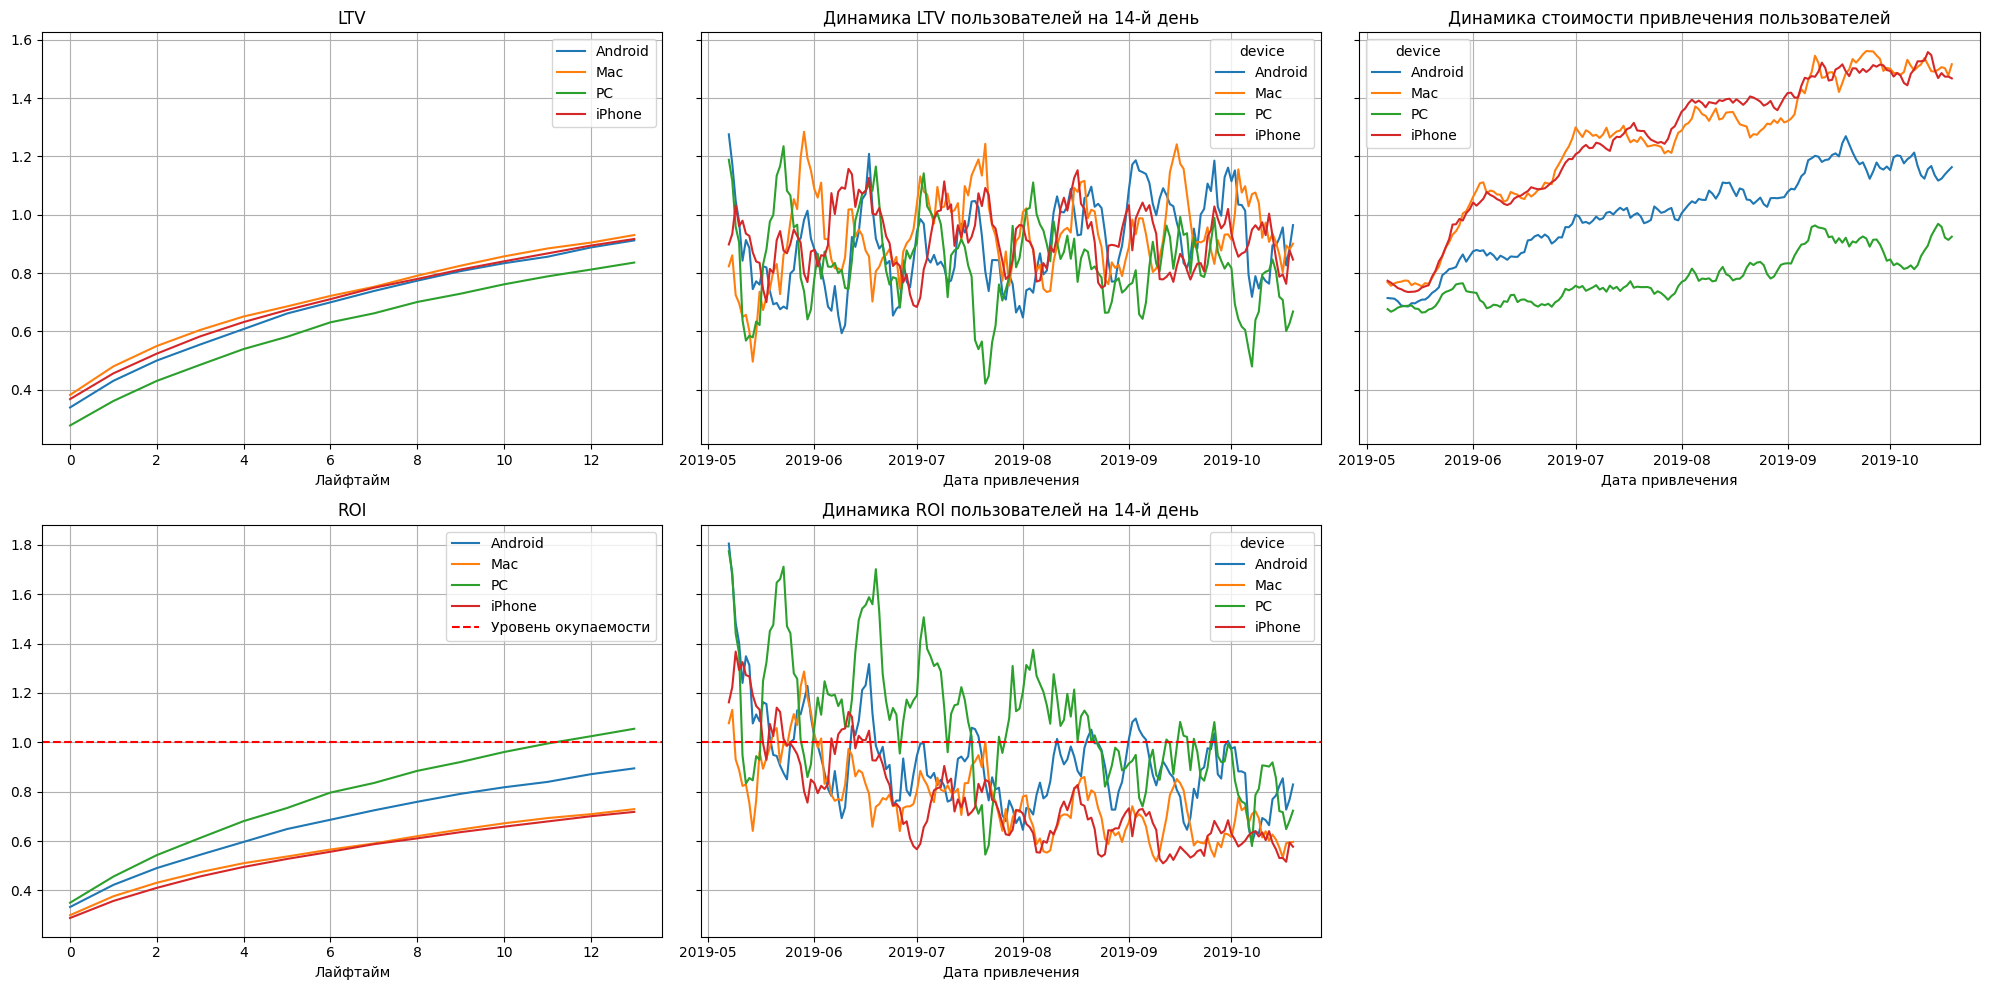

In [230]:
# считаем LTV и ROI с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_non_organic, orders, observation_date, horizon_days, dimensions = ['device'],
    ignore_horizon=False
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

LTV для PC немного ниже, чем для других устройств. Однако для этого устройства самый низкий CAC, также этот показатель ниже для Android, в отличие от iPhone и Mac с самым высоким CAC. Уровня окупамости достигает лишь PC к 11 дню, остальные устройства остаются ниже (максимум 90% для Android и 70% для Mac и iPhone).

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

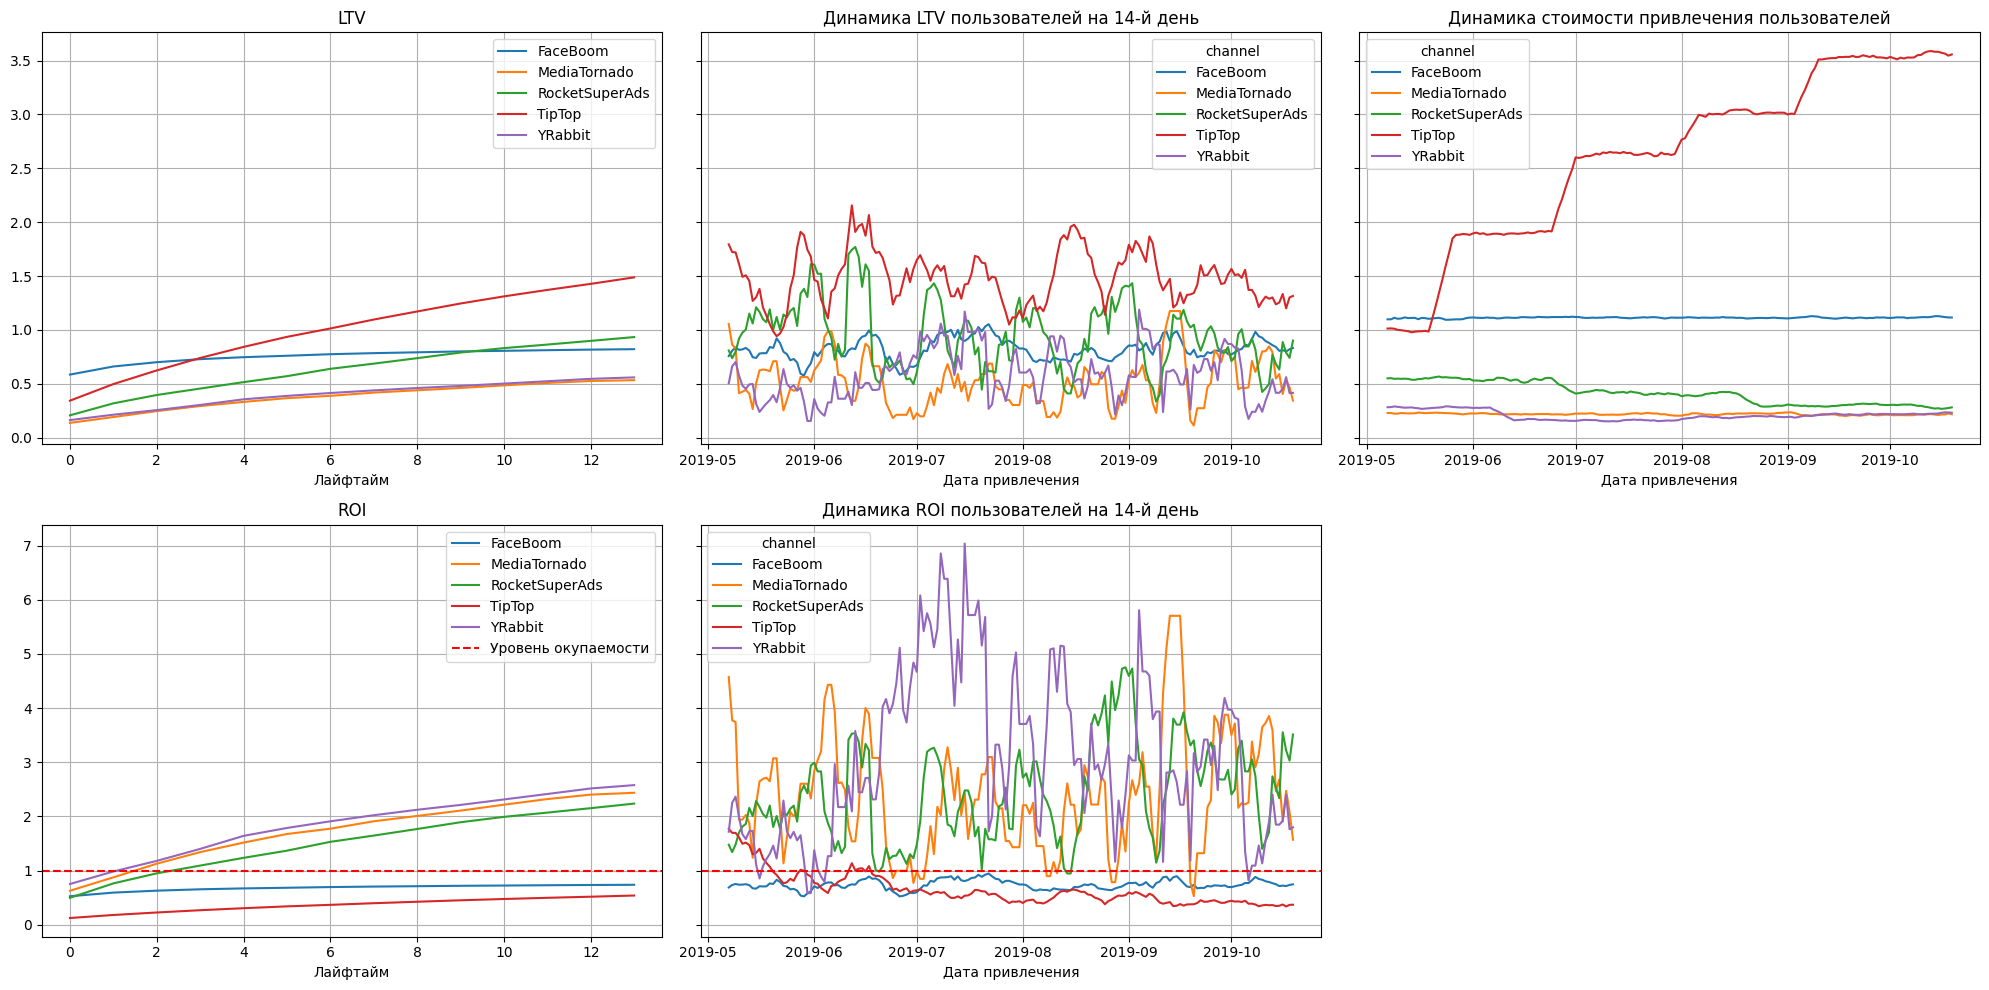

In [231]:
# считаем LTV и ROI с разбивкой по рекламным каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_non_organic_USA, orders, observation_date, horizon_days, dimensions = ['channel'],
    ignore_horizon=False
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Очень заметен рост CAC для канала TipTop: с мая по октябрь он вырос в 3,5 раза. Для остальных каналов продвижения этот показатель стабилен. ROI для большинства каналов кроме TipTop, FaceBoom, AdNonSense достигает показателя окупаемости. То есть каналы, которые принесли больше всего платящих пользователей, не окупаются.

Проанализируем окупаемость рекламы с разбивкой по странам.

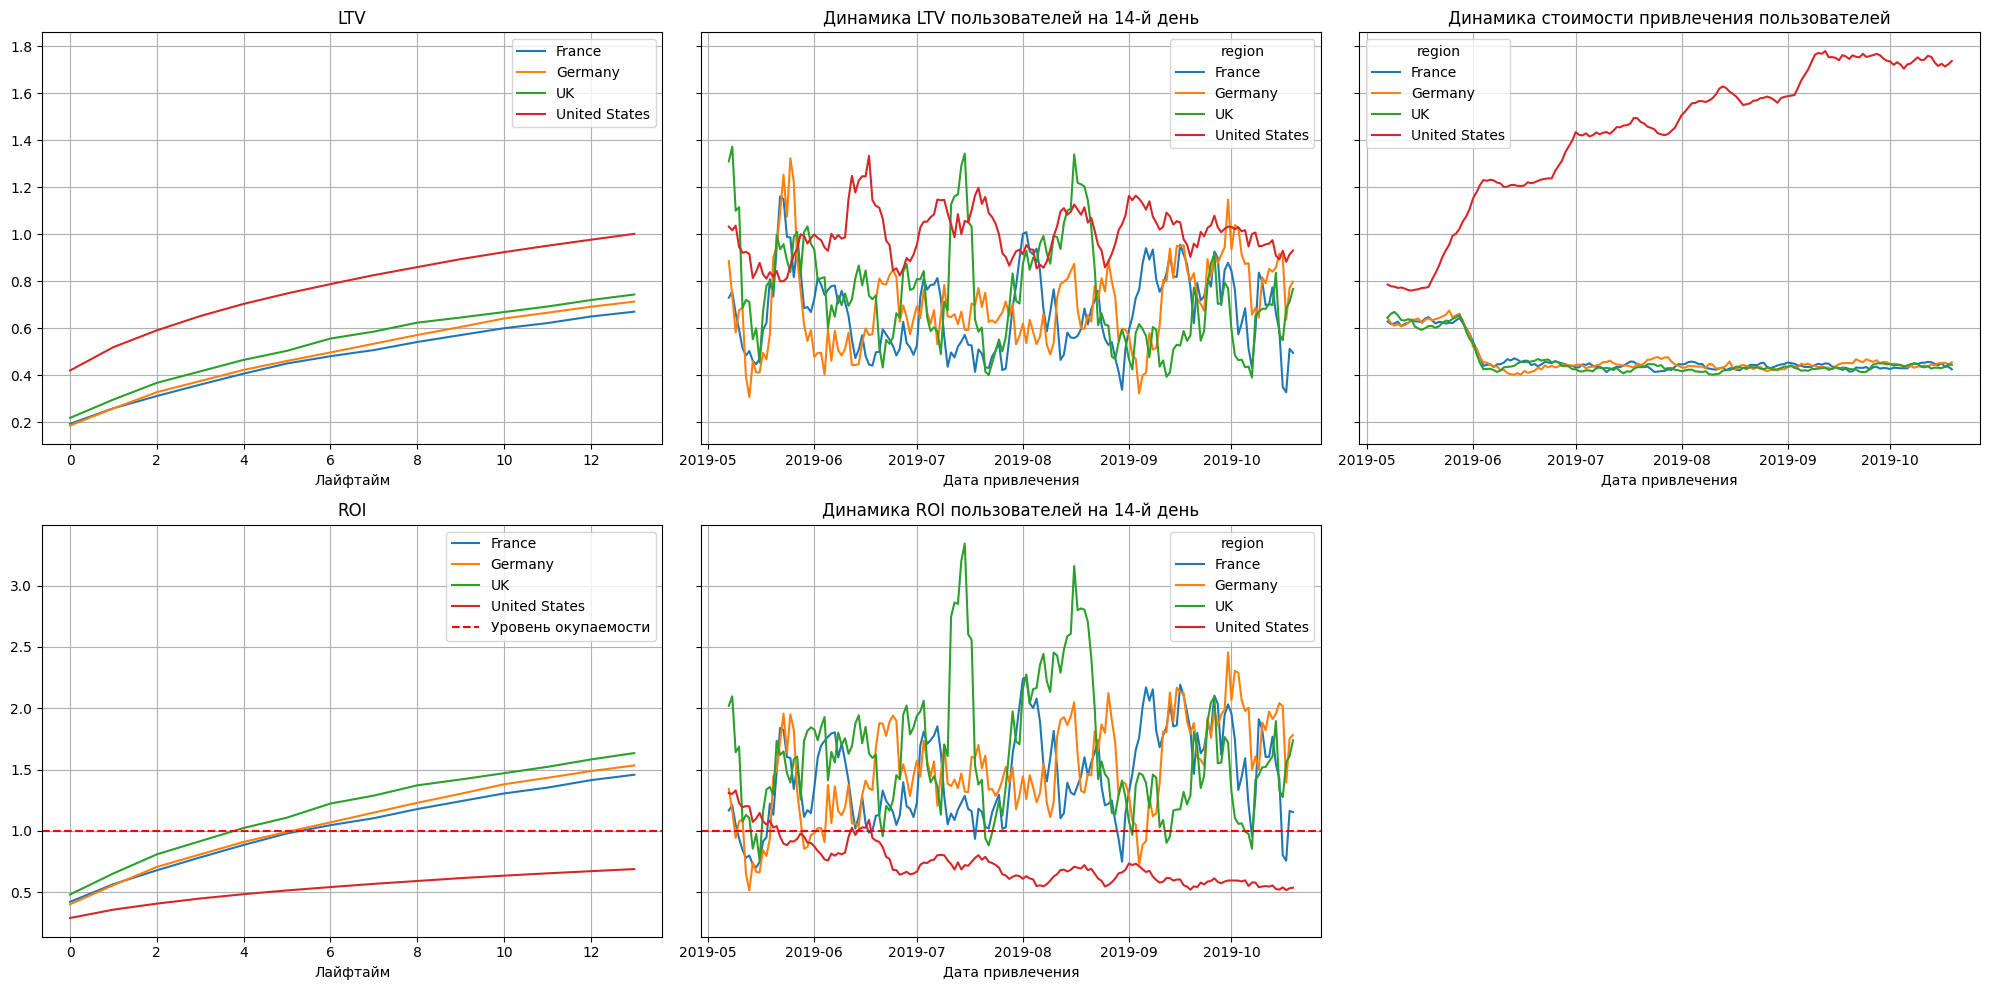

In [232]:
# считаем LTV и ROI с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_non_organic, orders, observation_date, horizon_days, dimensions = ['region'],
    ignore_horizon=False
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Разбивка по странам позволяет выделить США: 
* LTV выше, чем для других стран
* очень сильный рост CAC практически с самого начала продвижения. Для других стран этот показатель упал в июне 2019 года и оставался стабильным до октября
* ROI ниже уровня окупаемости. Динамика этого показателя на 14-й день также ниже уровня окупаемости. У остальных стран окупаемость выше 100% на 4-6 лайфтайм.

Узнаем, в чём причина: в низкой конверсии или низком удержании. 

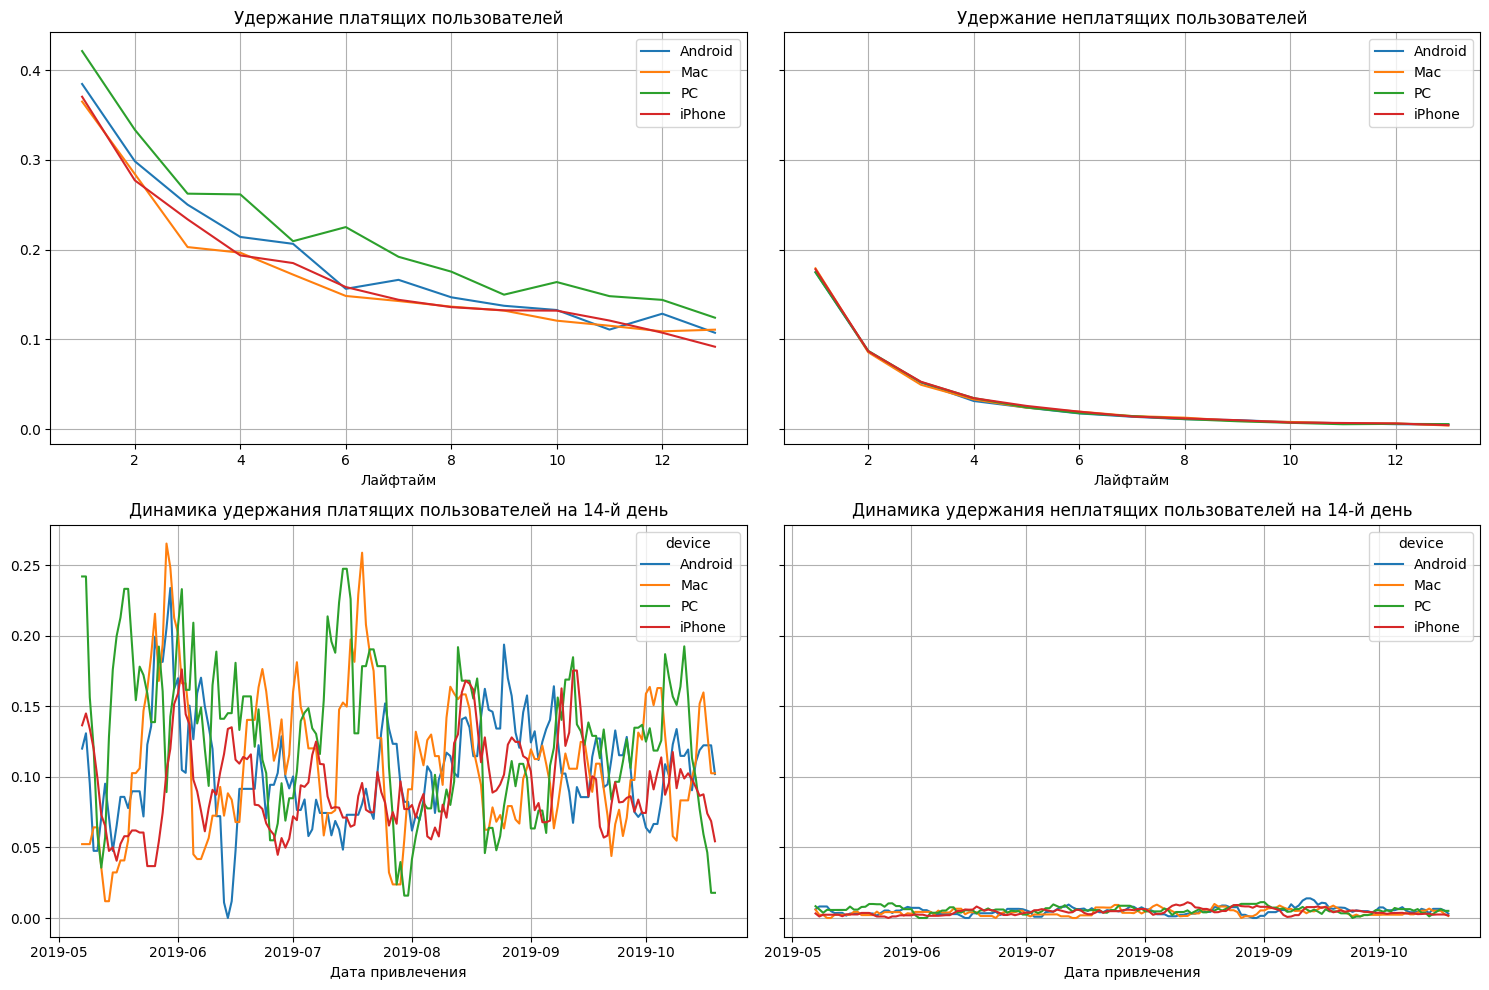

In [233]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_non_organic, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Конверсия для всех устройств стабильно растет, однако показатель для PC заметно ниже, чем для остальных девайсов.
Удержание также стабильно для всех устройств.

Рассмотрим конверсию и удержание с разбивкой по странам.

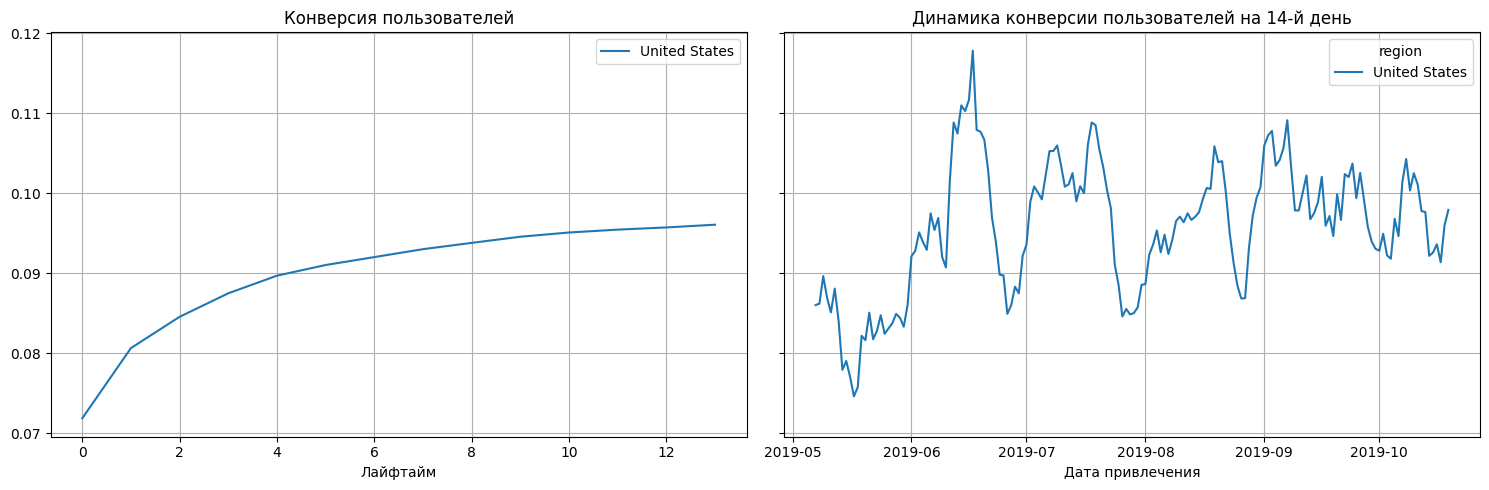

In [234]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_non_organic_USA, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

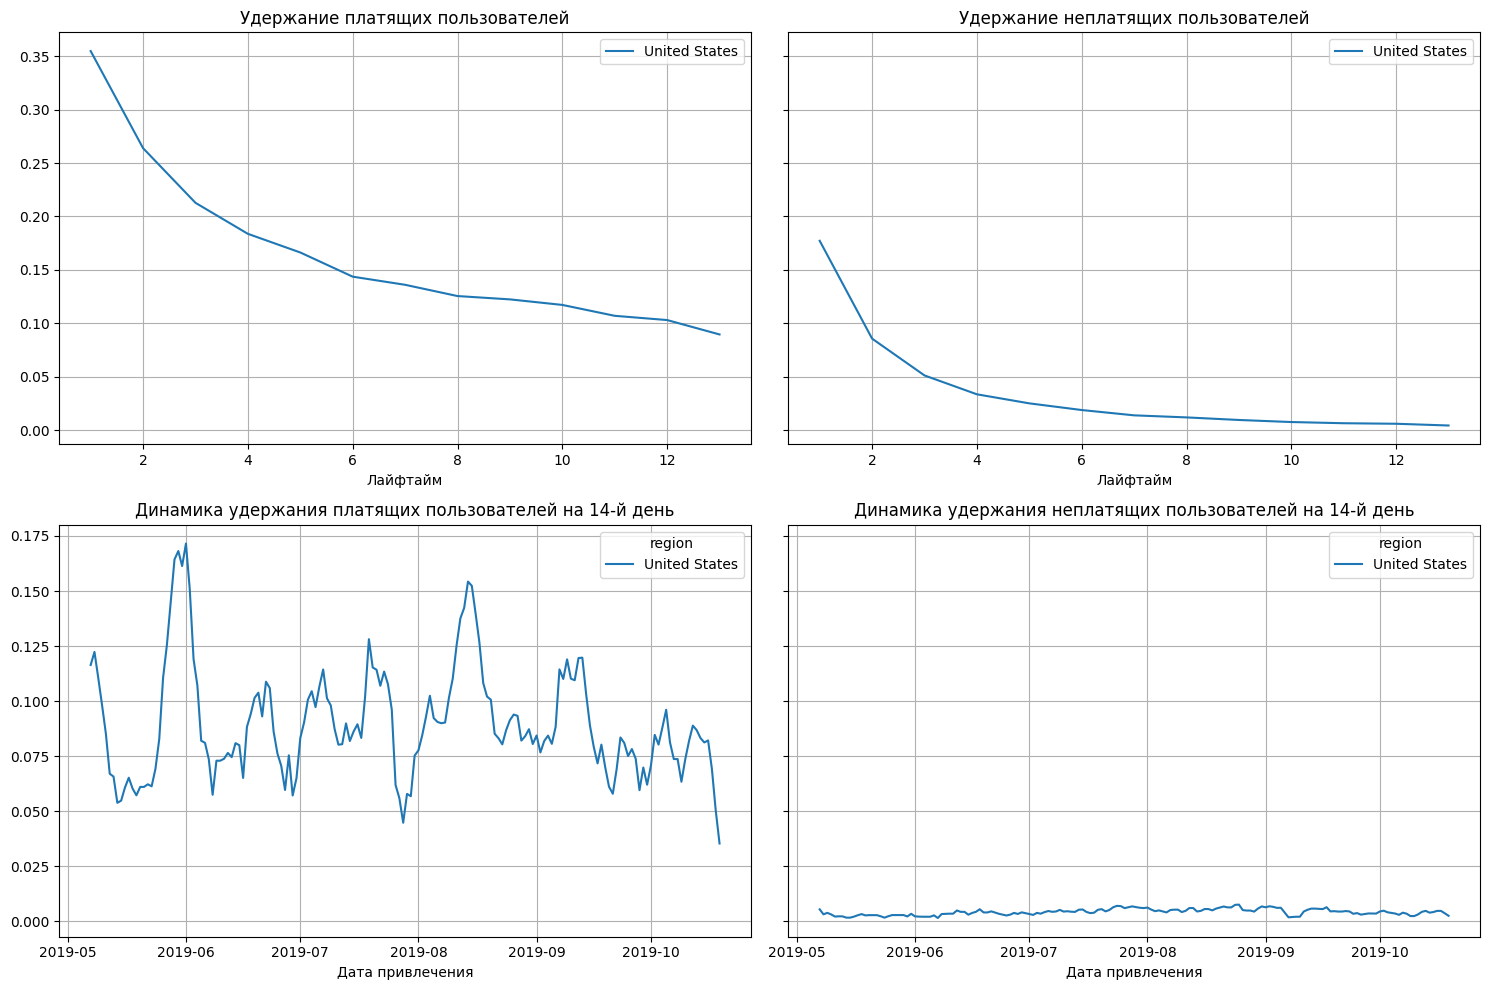

In [235]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_non_organic_USA, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вновь выделяется США: для этой страны как конверсия, так и удержание видимо отличаются от других стран. Для США конверсия почти в два раза выше, чем для других стран, однако удержание платящих пользователей ниже, чем для других стран.
То есть пользователи из США гораздо лучше конвертируются в платящих, но гораздо хуже удерживаются.

Рассмотрим также конверсию и удержание с разбивкой по каналам привлечения.

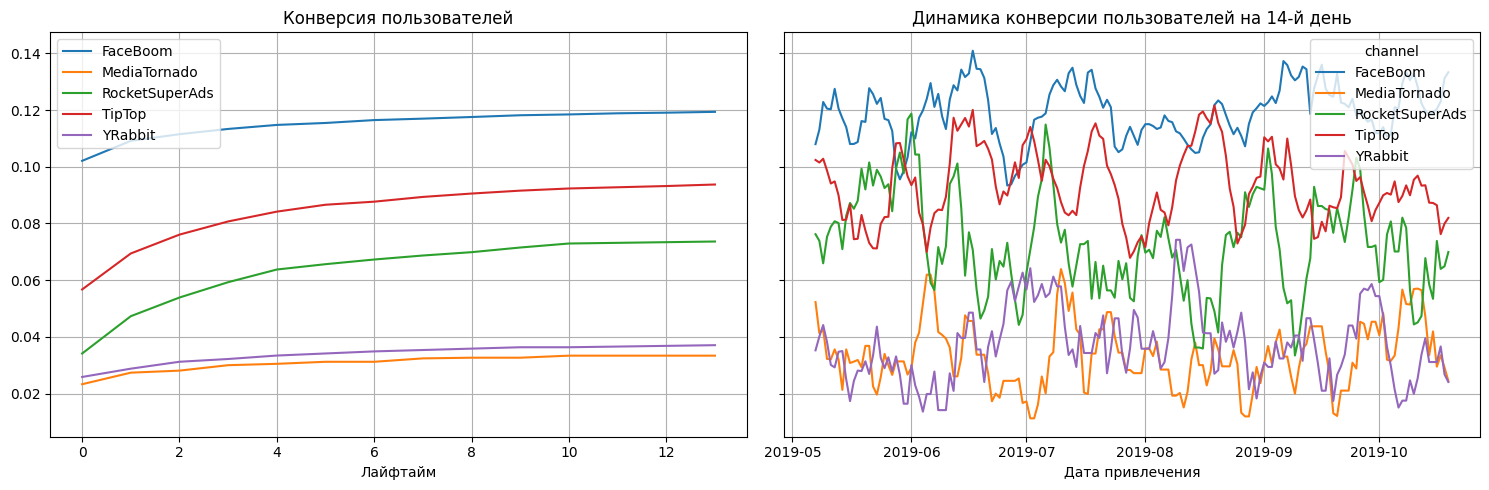

In [236]:
# смотрим конверсию с разбивкой по каналам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_non_organic_USA, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

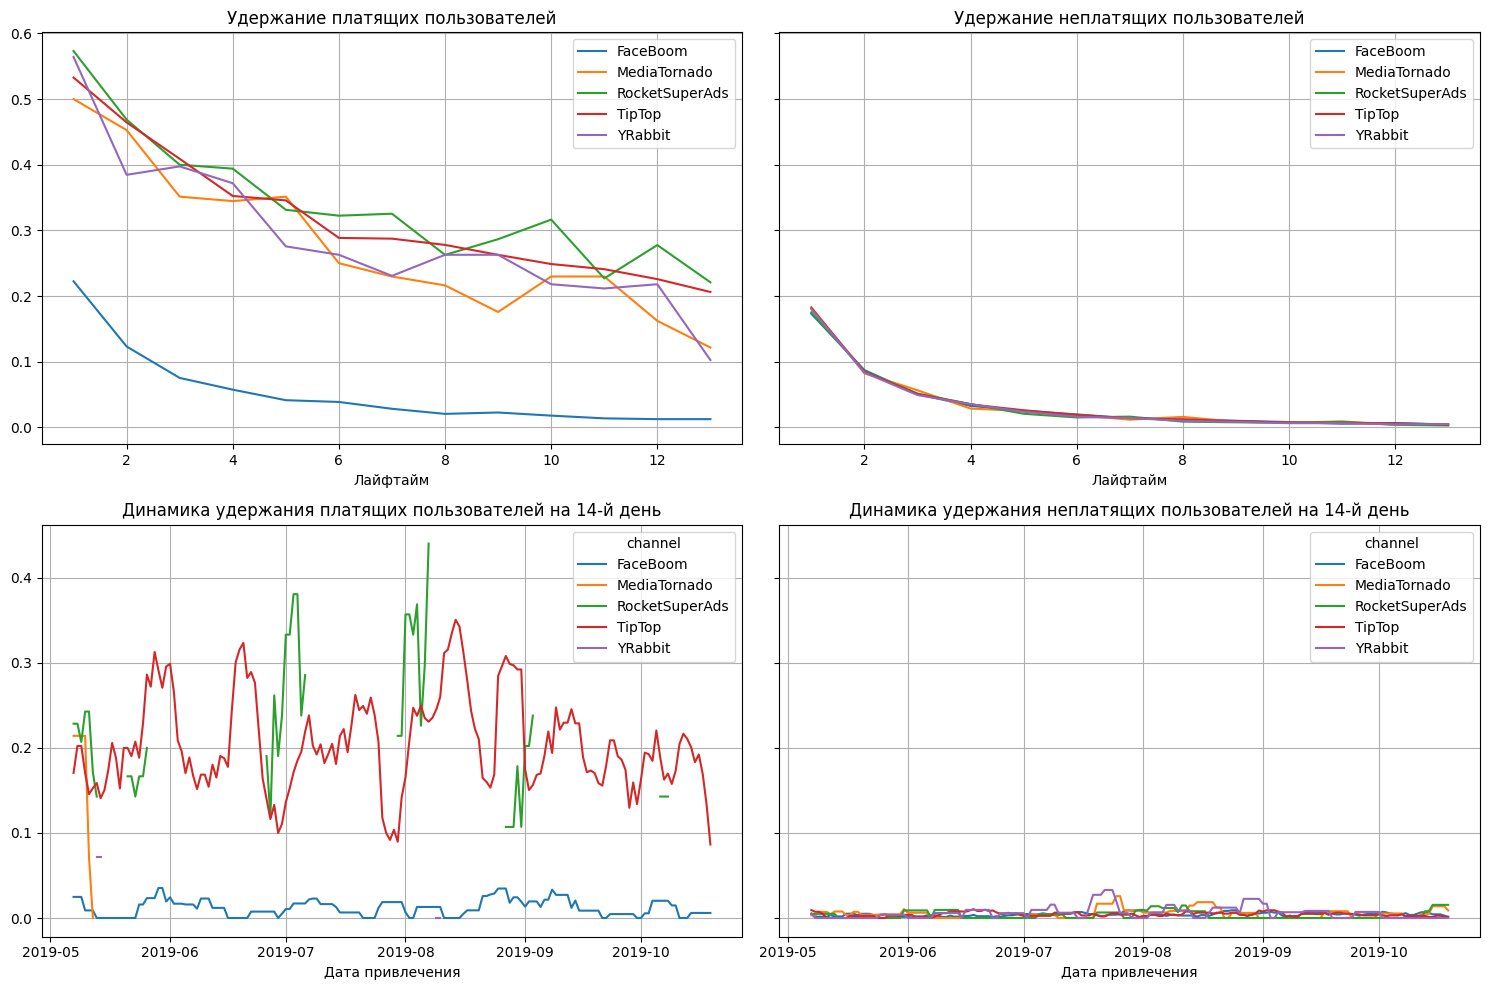

In [237]:
# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_non_organic_USA, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Самая высокая конверсия — у платформы FaceBoom (далее следует AdNonSense), у нее же самое низкое удержание (также как и у AdNonSense). Процент удержания пользователей, пришедших с FaceBoom, на 14-й день практически нулевой.
Высокая конверсия (около 10 %) также у lambdaMediaAds и TipTop.

## 7. Общий вывод
<a name="sumup"></a>

На основании данных о пользователях, привлечённых с 1 мая по 27 октября 2019 года, нам необходимо было изучить:
    
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

А также разобраться в причинах уботочности рекламных кампаний за последние месяцы и помочь компании выйти в плюс.

В ходе исследования мы проверили данные на пропуски и дубликаты, провели исследовательский анализ, оценили маркетинговые расходы, проанализировали окупаемость рекламы, используя графики LTV, ROI и CAC, и сделали общий вывод.

На этапе исследовательского анализа данных мы создали пользовательсике профили, которые позволили сделать следующие выводы:

* в приложение приходят пользователи из 4 стран: United States, UK, France и Germany. Больше всего платящих пользователей приходится на United States — почти в 10 раз больше чем на следующую страну в списке. Самая высокая доля платящих пользователей также приходится на США (почти 7%), однако в Германии, Великобритании и Франции доли меньше примерно в два раза, а не в 10, как в общем количестве пользователей;
* клиенты заходят в приложение со следующих устройств: iPhone, Android, Mac и PC, самое популярное устройство среди платящих пользователей — iPhone. Однако доля платящих пользователей от общего количества пользователей выше (хоть и незначительно) для Mac, чем для iPhone;
* самый популярный канал привлечения ожидаемо Organic (почти в два раза популярнее следующего в списке канала FaceBoom), однако по количеству платящих пользователей этот канал находится лишь на третьем месте. Больше всего платящих пользователей принес канал FaceBoom, на втором месте TipTop. Что касается доли платящих пользователей по отношению к неплатящим, то тут также лидирует канал FaceBoom, TipTop же находится лишь на четвертом месте. Органические пользователи почти не платят, их доля лишь 2 процента.

Анализ маркетинговых расходов показал, что:

* всего на рекламу за исследуемый период было потрачено 105497 рублей, половина из этой суммы была вложена в канал TipTop, который, как мы помним, находится на втором месте по количеству и на четвертом по доле платящих пользователей. Треть рекламного бюджета была вложена в продвижение на канале FaceBoom, который оказался наиболее выгодным и принес наибольшее количество и наибольшую долю платящих пользователей при более низком уровне затрат;
* траты на продвижение с помощью TipTop значительно росли на протяжении времени и достигли своего пика (13000 рублей) в сентябре 2019 года, в то время как расходы на FaceBoom держались примерно на одном уровне, не превышая 6000 рублей в месяц. У остальных каналов продвижения похожее распределение трат во времени: повышение или снижение расходов в июне и с этого времение затраты держались на одном уровне до октября 2019 года;
* средняя стоимость привлечения одного пользователя — 0,703 руб., а стоимость привлечения платного пользователя — 1,127 руб. Самый дорогой привлеченный с помощью рекламы пользователь — с платформы TipTop, пользователь с платформы FaceBoom — в 2,5 раза дешевле.

На этапе построения графиков LTV, ROI и CAC мы исключили органических пользователей из анализа, т.к. нам необходимо было понять, окупается ли реклама, то есть соотнести затраты на маркетинг с результатом. Органические пользователи приходят самостоятельно, они "бесплатны", поэтому для оценки окупаемости она нам не нужны. 

После расчета и визуализации LTV и ROI стало очевидно, что реклама не окупается: к 14 дню после привлечения пользователей ROI лишь приближается к 80%. Причем этот показатель 14-го дня снижается от месяца к месяцу. CAC растет, особенно заметен резкий скачок в июне 2019 года, после чего показатель только увеличивается. 

Затем мы проанализировали окупаемость рекламы с разбивкой по устройствам и обнаружили, что LTV для PC немного ниже, чем для других устройств. Однако для этого устройства самый низкий CAC и это единственное устройство, которое достигает уровня окупамости. Остальные устройства остаются ниже этого уровня (максимум 90% для Android и 70% для Mac и iPhone).

Затем мы проанализировали окупаемость рекламы с разбивкой по рекламным каналам и увидели очень заметный рост CAC для канала TipTop: с мая по октябрь он вырос в 3,5 раза. Для остальных каналов продвижения этот показатель был стабилен. ROI для большинства каналов кроме TipTop, FaceBoom, AdNonSense достигал показателя окупаемости. То есть каналы, которые принесли больше всего платящих пользователей, не окупаются.

Затем мы проанализировали окупаемость рекламы с разбивкой по странам и увидели, что особенно выделяется США: 
* LTV выше, чем для других стран
* очень сильный рост CAC практически с самого начала продвижения. Для других стран этот показатель упал в июне 2019 года и оставался стабильным до октября
* ROI ниже уровня окупаемости. Динамика этого показателя на 14-й день также ниже уровня окупаемости. У остальных стран окупаемость выше 100% на 4-6 лайфтайм.

Для того, чтобы узнать, в чем причина — низкой конверсии или низком удержании, мы проанализировали конверсию и удержание с разбивкой по устройствам, странам и каналам привлечения и сделали вывод, что:
* конверсия для всех устройств стабильно растет, однако показатель для PC заметно ниже, чем для остальных девайсов. Удержание также стабильно для всех устройств;
* разбивка по странам вновь выделяет США: для этой страны как конверсия, так и удержание видимо отличаются от других стран. Для США конверсия почти в два раза выше, чем для других стран, однако удержание платящих пользователей ниже, чем для других стран. То есть пользователи из США гораздо лучше конвертируются в платящих, но гораздо хуже удерживаются.
* разбивка по каналам привлечения показывает, что самая высокая конверсия — у платформы FaceBoom (далее следует AdNonSense), у нее же самое низкое удержание (также как и у AdNonSense). Процент удержания пользователей, пришедших с FaceBoom, на 14-й день практически нулевой. Высокая конверсия (около 10 %) также у lambdaMediaAds и TipTop.

Анализ данных позволяет сделать следующие выводы:
* реклама не окупается: к 14 дню после привлечения пользователей ROI лишь приближается к 80%. Причем этот показатель 14-го дня снижается от месяца к месяцу. CAC растет, особенно заметен резкий скачок в июне 2019 года, после чего показатель только увеличивается;
* самый низкий CAC у PC, и это единственное устройство, которое достигает уровня окупамости. Реклама для остальных устройств не окупается (максимум 90% для Android и 70% для Mac и iPhone). Конверсия для всех устройств стабильно растет, однако показатель для PC заметно ниже, чем для остальных девайсов. Удержание стабильно для всех устройств;
* у канала TipTop очень высокий CAC, который только растет. ROI для этого канала не достигает показателя окупаемости, это касается также  FaceBoom и AdNonSense. То есть каналы, которые принесли больше всего платящих пользователей, не окупаются. Самая высокая конверсия — у платформы FaceBoom, у нее же самое низкое удержание. Процент удержания пользователей, пришедших с FaceBoom, на 14-й день практически нулевой;
* очень сильно влияет на общие показатели США: у этой страны LTV выше, чем для других стран, заметен очень сильный рост CAC практически с самого начала продвижения, ROI ниже уровня окупаемости (включая динамику на 14-й день). У остальных стран окупаемость стала выше 100% на 4-6 лайфтайм. Также у США как конверсия, так и удержание видимо отличаются от других стран — пользователи из США гораздо лучше конвертируются в платящих, но гораздо хуже удерживаются.

Рекомендации для отдела маркетинга:
* пересмотреть объемы рекламных трат для канала TipTop, на которой пришлась половина рекламного бюджета, но который находится лишь на четвертом месте по доле платящих пользователей. Траты для этого канала увеличиваются, растет CAC, а ROI не достигает уровня окупаемости;
* необходимо проанализировать возможные причины того, почему пользователи, пришедшие из канала FaceBoom, конвертируются лучше всего, однако хуже всего удерживаются;
* увеличить конверсию для Android, Mac и iPhone. Уровень удержания стабилен;
* пересмотреть траты на рекламу в США — пользователи из США гораздо лучше конвертируются в платящих, но гораздо хуже удерживаются, так же как и пользователи, приведшие из канала FaceBoom, вероятно, тут может быть зависимость. К тоже же у страны очень высокий и постоянно растущий CAC и ROI, который не превышает уровень окупаемости.

